In [185]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pdb
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [186]:
# read the banking_data set
data = pd.read_csv('/Users/liu/Desktop/6120/assignment 1/train.csv',delimiter=';')

# Part 1: Data Preprocessing 

## DATA CLEANING

Clean missing value and duplicates.

In [187]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [189]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [190]:
data = data.dropna()  # Drop rows if with missing values
data = data.drop_duplicates() # Remove if has duplicates 

In [191]:
data.info() # Check data types again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We can see there is no dupilicates and missing values

In [192]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

Clean outliers

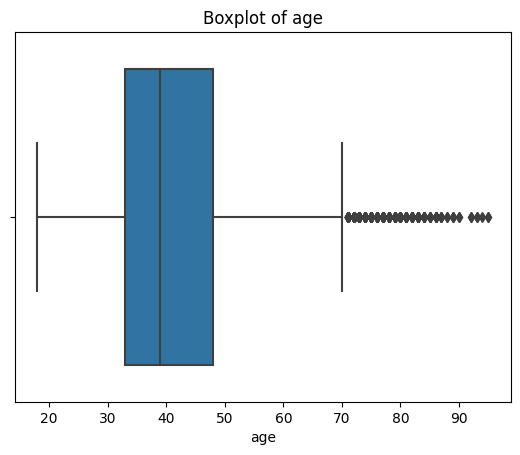

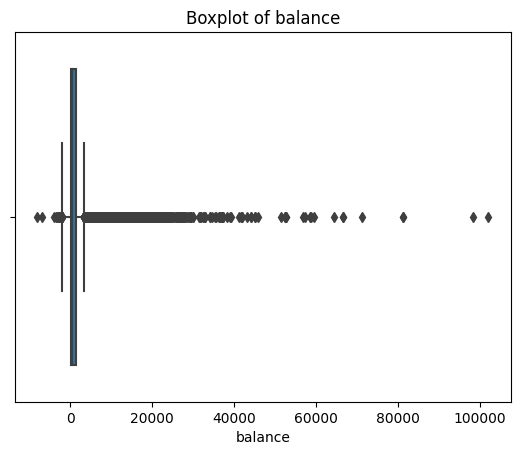

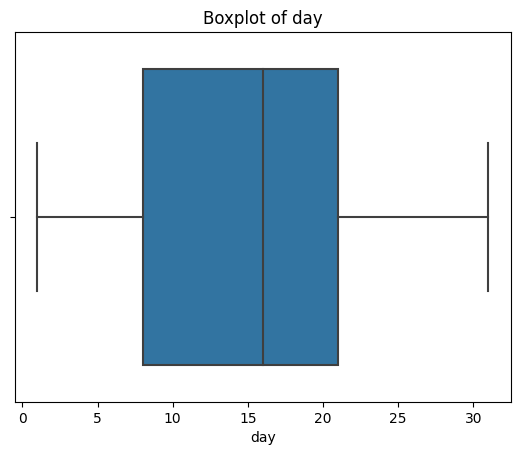

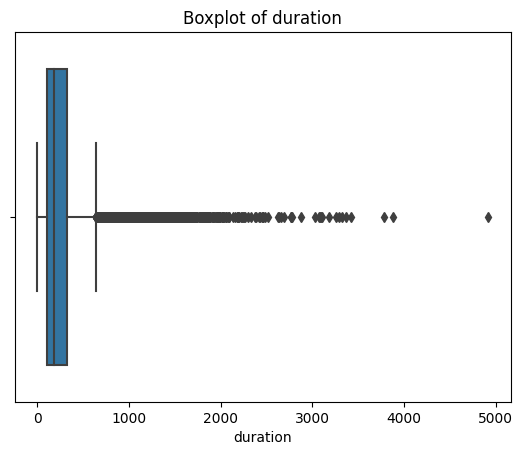

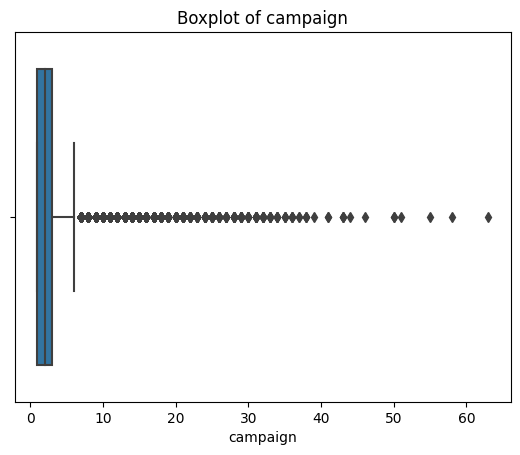

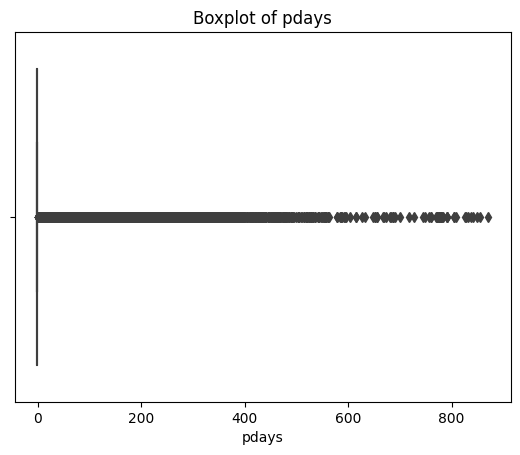

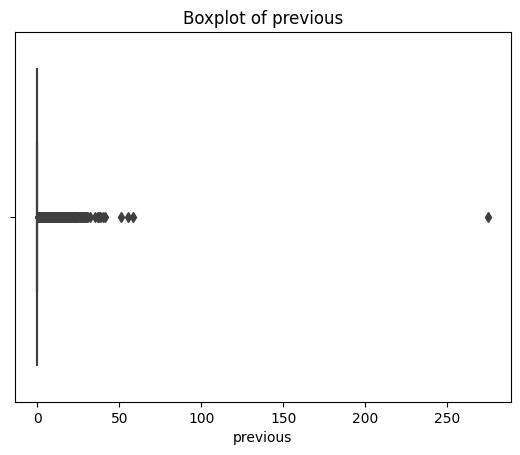

In [193]:
# Create separate boxplots for numerical columns
for column in num_cols:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=data)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

I think the outliers are meaningful so don't drop outliers

Build a pipeline to process the data

In [194]:
#Create transformers for one-hot encoding and scaling
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Drop first category to avoid multicollinearity
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [195]:
# Create a column transformer for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [196]:
# Create a final preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [197]:
# Split the data into features (X) and target (y)
X_train = data.drop(columns=['y'])
y_train = data['y']

In [198]:
X_train_preprocessed = pipeline.fit_transform(X)

Explanation and Justification:

Categorical columns are 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'

 Contain information that cannot be directly used by most machine learning algorithms, which typically require numerical input.  
 
 So, use one-hot encoding to convert these categorical columns into a numerical format.

 By dropping the first category, we ensure that each category is represented independently without introducing redundancy.

Numerical columns are 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'

Numerical features can have different scales, and some machine learning algorithms are sensitive to the scale of input features.  

 Standard scaling is applied to these numerical columns, which transforms them to have a mean of 0 and a standard deviation of 1.  This ensures that all numerical features are on a similar scale and can be treated equally by the algorithms.


By creating this preprocessing pipeline, we ensure all necessary transformations are consistently applied to data. 

# Part 2: Build Baseline Models

In [199]:
# Set up Logistic Regression and K-NN models to compare
logistic_model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)

In [200]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
}

In [201]:
# Create dictionary to store the results of each model
results = {}

In [202]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.763547  0.298364  0.429066  0.908769  1.286245
Logistic Regression   0.624762  0.315688  0.419437  0.899591  0.853760


## Interpretation
Predictions:  For KNN, it's approximately 0.763547, meaning that when KNN predicts a 'yes' (positive) outcome, it's correct about 76.3% of the time.  For Logistic Regression, it's approximately 0.625. 
KNN is better.

Recall: Recall measures the ability of the model to identify all positive instances.  For KNN, it's approximately 0.298, meaning that it correctly identifies about 29.8% of all actual 'yes' cases.  For Logistic Regression, it's approximately 0.315. 
Logistic Regression is better.

F1-Score: The F1-Score is the harmonic mean of precision and recall.  It provides a balance between precision and recall.  For KNN, it's approximately 0.429, and for Logistic Regression, it's approximately 0.419.
KNN is better.

Accuracy: Accuracy measure s the overall correctness of the model's predictions.  Both models have high accuracy, with KNN at approximately 90.8% and Logistic Regression at approximately 89.9%.
KNN is better.

Time (s): This represents the time it took for each model to train and make predictions.  KNN took approximately 1.28 seconds, while Logistic Regression took approximately 0.85 seconds.
KNN is better.

Logistic Regression generally outperforms KNN in recall.
KNN  outperforms Logistic Regression in redictions, F1-Score and Accuracy.

# Part 3: Ensemble Modelling

In [203]:
# Set up ensemble models to compare 
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting_hard_model = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)],voting='hard')#Voting Classifier with Hard Voting
voting_soft_model = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)],voting='soft')#Voting Classifier with Soft Voting

In [204]:
classifiers = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting (Hard)': voting_hard_model,
    'Voting (Soft)': voting_soft_model
}

In [205]:
# Create dictionary to store the results of each model
results = {}

In [206]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

               Precision    Recall  F1-Score  Accuracy  Time (s)
Decision Tree   0.971092  0.872955  0.919412  0.982417  0.762641
Random Forest   1.000000  1.000000  1.000000  1.000000  5.366971
AdaBoost        0.626072  0.351299  0.450062  0.901360  4.970444
Bagging         0.994840  0.927815  0.960159  0.991153  3.773022
Voting (Hard)   0.859470  0.406160  0.551634  0.924140  2.307861
Voting (Soft)   0.942611  0.632339  0.756912  0.953334  1.923509


# Part 4: Performance Comparison

In [207]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting (Hard)': voting_hard_model,
    'Voting (Soft)': voting_soft_model
}

In [208]:
# Create dictionary to store the results of each model
results = {}

In [209]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }
# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.763547  0.298364  0.429066  0.908769  1.391764
Logistic Regression   0.624762  0.315688  0.419437  0.899591  0.854698
Decision Tree         0.973118  0.871030  0.919248  0.982417  0.819423
Random Forest         1.000000  1.000000  1.000000  1.000000  5.299657
AdaBoost              0.626072  0.351299  0.450062  0.901360  4.633874
Bagging               0.995868  0.927815  0.960638  0.991264  3.201010
Voting (Hard)         0.859470  0.406160  0.551634  0.924140  2.103089
Voting (Soft)         0.944126  0.634264  0.758780  0.953666  1.877773


## Compare the performance of all model
Random Forest has the highest accuracy but is computationally expensive.
Bagging and Logistic Regression have a good balance of accuracy and reasonable runtime.
Decision Tree has moderate performance.
AdaBoost has a moderate accuracy but takes a longer time to run.
K-Nearest Neighbors has decent precision and accuracy.
Voting classifiers provide competitive accuracy with reduced time compared to some individual models.

When choosing the best model we should consider a trade-off between accuracy and runtime, depending on your specific use case and computational resources

# Part 5: Interpretation and Justification
### Why did the ensemble models perform the way they did?
Random Forest achieved perfect scores (1.000) for all metrics, including precision, recall, F1-score, and accuracy.  This high performance suggests that Random Forest was able to capture complex relationships in the data and fit it very well. But perfect scores on a training dataset might be indicative of overfitting.

The Bagging Classifier also performed exceptionally well, with very high scores for precision, recall, F1-score, and accuracy.  Bagging was able to reduce variance and generalize effectively on the training data.

Voting Classifier with hard voting achieved a moderate balance between precision and recall, with lower scores compared to Random Forest and Bagging.  Voting Classifier with soft voting showed a significant improvement in terms of precision, recall, and F1-score. In our case, soft voting, which takes into account the confidence of each classifier's prediction, improved the performance.

Logistic Regression showed lower scores compared to ensemble methods, indicating that it may not capture the data's complexity as well as other models.  However, Logistic Regression is computationally efficient and interpretable.

K-NN had a relatively low precision and recall, suggesting that it might not be the best choice for this dataset.  K-NN can struggle with high-dimensional data.

### If you had to pick one model to implement in business process, which would it be and why?
If interpretability is crucial and computational cost is a concern, Logistic Regression could be a good choice.

If maximizing predictive performance is the primary goal, Random Forest or Bagging Classifier may be preferred. 

The choice ultimately depends on the specific business requirements, available resources, and the importance of interpretability

### What decision criteria did you use to arrive at this conclusion?
Decision criteria: 

Interpretability: Logistic Regression are highly interpretable models, which can be advantageous in a business setting where understanding the reasons behind predictions is crucial for decision-making.

Performance: Random Forest and Bagging Classifier performed exceptionally well on this dataset. However, the perfect scores achieved by Random Forest may indicate overfitting.

Computational Cost: Random Forest and Bagging Classifier tend to be computationally more expensive than Logistic Regression and Decision Trees.   If computational resources are limited, this should be a consideration. The bank's computational resources are limited so Computational Cost should be considered. 

Precision-Recall Trade-off: Depending on the business goal, in a telemarketing campaign, we might prioritize precision, identifying customers who are most likely to subscribe, as targeting a large number of false positives could be costly.